In [43]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [44]:
mean = 3
cov  = 3
samples = 60000
# input_size = 784
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def relu(x):
    x[x<0]=0
    return x

def relu(x, derivative=False):
    res = x
    return res * (res > 0)

def diff_relu(x):
    res = x
    return res * (res > 1)

def diff_SSE(y,x):
    return (2*(y-x))/samples

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_layer(prev_delta,out_prev):
    sn = -np.multiply(diff_relu(out_prev),np.sum(prev_delta, axis=1).reshape(samples,1))
    return sn

Wm = np.random.normal(0,1,(input_size,mean))
Bm = np.random.normal(0,1,(1,mean))

Wc = np.random.normal(0,1,(input_size,mean))
Bc = np.random.normal(0,1,(1,mean))

Wd = np.random.normal(0,1,(mean,input_size))
Bd = np.random.normal(0,1,(1,input_size))

In [45]:
#Here the covariance is log coavriance but named as coavriance for peace of mind while coding
lr = 1e-2
epochs = 100
for i in range(epochs):
    loss = 0
    wm = np.zeros(Wm.shape)
    bm = np.zeros(Bm.shape)
    wc = np.zeros(Wc.shape)
    bc = np.zeros(Bc.shape)
    wd = np.zeros(Wd.shape)
    bd = np.zeros(Bd.shape)
    #forward pass
    outm = layer(X,Wm,Bm)
    mean = relu(outm)
    outc = layer(X,Wc,Bc)
    cova = relu(outc)
    gaus = np.random.normal(0,1,(cova.shape))
    Z    = mean + np.multiply((np.exp(0.5*cova)),gaus)
    outy = layer(Z,Wd,Bd)
    y    = sigm(outy)
    # Backprop
    temp = diff_SSE(y,X)*diff_sigm(outy)
    bd   = np.sum(temp,axis=0)
    wd   = np.matmul(Z.T,temp)
    ### stupid trouble child
    tempm = backprop_layer(temp,outm)
    sm1   = tempm + diff_relu(outm)
    tempc = backprop_layer(temp,outc)*np.exp(0.5*cova)*0.5*gaus
    sm2   = tempc + 0.5*diff_relu(outc)*(np.exp(cova)-1)
    ### stupid trouble child ended
    
    bm = np.sum(sm1, axis=0).reshape(bm.shape)
    wm = np.matmul(X.T,sm1)
    
    bc = np.sum(sm2, axis=0).reshape(bc.shape)
    wc = np.matmul(X.T,sm2)
    
    loss_1 = np.linalg.norm(y-X)/samples
#     loss_1 = np.sum((X*np.log(X/y)) + ((1-X)/(1-y)),axis =1)
    loss_2 = np.sum(np.exp(cova)-1-cova + mean*mean ,axis=1)
    loss   = loss_1 + np.sum(loss_2)
    print(loss)
    
    Wm -= lr*wm
    Bm -= lr*bm
    Wc -= lr*wc
    Bc -= lr*bc
    Bd -= lr*bd
    Wd -= lr*wd

/home/aravind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


1016936171.235037
0.031673045073435636
0.03166910875860523
0.03166643718930038
0.03164384890279963
0.03164283716886416
0.03162328293814065
0.031622835922750094
0.03160306721346751
0.03160345311441431
0.03158464253074326
0.03157079654633569
0.031558672120187356
0.03154348512628259
0.03154362904103077
0.03151929538787395
0.03152066923722412
0.03150838841532111
0.031492319890847574
0.031492934024428404
0.031481653952616415
0.031458747418282584
0.03145661402657191
0.03144112757022367
0.031439431676093275
0.03140895246744774
0.03140434117609879
0.031402140173016325
0.03139347186662488
0.031374510072071295
0.03137108008315562
0.03135653401057646
0.03133106390260643
0.031350222435044685
0.03131512464149771
0.03132213206661086
0.03129434864091991
0.03130179993608444
0.03128550652359252
0.031269185678689915
0.031261320936384195
0.03124952006664188
0.03124365459893755
0.031231068445337937
0.03122214767800896
0.031221631846617772
0.031194456131262534
0.031193111576251344
0.03116473488930486
0.031

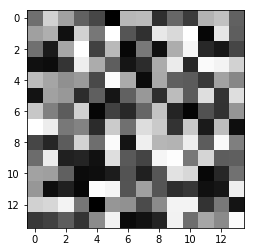

In [46]:
outy = layer(np.random.normal(0,1,(cova.shape)),Wd,Bd)
y    = sigm(outy)
y = y*255.0
plt.imshow(y[1].reshape(14,14), cmap='gray')
plt.show()